<span style="font-size: 150%;color:white;background:#38761d"> A task for the recruitment process

<span style="font-size: 150%;color:white;background:red">Wojciech Moszczyński



<span style="font-size: 300%;color:white;background:#38761d">neural network   
    
    from:
https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly.


<span style="font-size: 150%;color:#0c343d;background:#fff2cc"> For the first 10 products, please conduct the exploratory analysis and compute the forecast for the next 7 weeks.  

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import torch

import warnings 
warnings.filterwarnings("ignore")

device = torch.device('cuda') 

from sklearn.metrics import mean_squared_log_error

In [2]:
df = pd.read_excel('/media/wojciech/D6DE33C1DE339927/1A/dane1.xlsx')    
print(df.dtypes)
df.head(4)

Timestamp    datetime64[ns]
Value                 int64
dtype: object


,Timestamp,Value
0,2020-05-01 00:00:00.000,0
1,2020-05-01 00:00:10.000,10
2,2020-05-01 00:00:20.000,20
3,2020-05-01 00:00:29.985,30


In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [4]:

df['hour']= df['Timestamp'].dt.hour.astype(np.float32)
df['minute']= df['Timestamp'].dt.minute.astype(np.float32)
df['second']= df['Timestamp'].dt.second.astype(np.float32)

df.head(3)

,Timestamp,Value,hour,minute,second
0,2020-05-01 00:00:00,0,0.0,0.0,0.0
1,2020-05-01 00:00:10,10,0.0,0.0,10.0
2,2020-05-01 00:00:20,20,0.0,0.0,20.0


In [5]:
df = df.dropna(how='any')

In [6]:
df.columns

Index(['Timestamp', 'Value', 'hour', 'minute', 'second'], dtype='object')

In [7]:
df.shape

(501, 5)

max: 100
min: 0


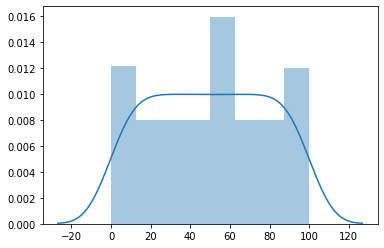

In [8]:
print('max:',df['Value'].max())
print('min:',df['Value'].min())

sns.distplot(np.array(df['Value']))

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">The population 

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Then we 

<span style="font-size: 210%;color:#0c343d;background:#fff2cc"> We create 
    
<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Now I creat

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Describing variables before scaling

In [9]:
x = df['second']
y = df['Value']

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">I download data - I do not need standardized sales because the primary data is enough for me.

<span style="font-size: 140%;color:#0c343d;background:#fff2cc">Dividing time series data into training and test sets.

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">I split the set for training data for the first 42 weeks, then I separate the 44 and 45 test data set. Finally, as instructed, I allow a period of 7 weeks to make a forecast for 10 products. This will be the week: 45, 46, 47, 48, 49, 50, 51, 52. I will use this data at the end of the task when I have my model ready.

In [10]:
df['hour'].value_counts()

0.0    361
1.0    140
Name: hour, dtype: int64

In [11]:
del df['Timestamp'] 

In [12]:
train = df[df['hour'] == 0]
test = df[df['hour'] == 1]

In [13]:
test.head(3)

,Value,hour,minute,second
361,10,1.0,0.0,8.0
362,20,1.0,0.0,18.0
363,30,1.0,0.0,28.0


In [14]:
train.head(3)

,Value,hour,minute,second
0,0,0.0,0.0,0.0
1,10,0.0,0.0,10.0
2,20,0.0,0.0,20.0


In [15]:
Xtrain, Xtest = train.drop(['Value'], axis=1), test.drop(['Value'], axis=1) 
ytrain, ytest = train['Value'].values, test['Value'].values                  

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Score (quantity of sales) before scaling</span>  

In [16]:
ytrain[:5]

array([ 0, 10, 20, 30, 40])

In [17]:
ytest[:5]

array([10, 20, 30, 40, 50])

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Describing variables before scaling

In [18]:
Xtrain[:3]

,hour,minute,second
0,0.0,0.0,0.0
1,0.0,0.0,10.0
2,0.0,0.0,20.0


In [19]:
Xtest[:3]

,hour,minute,second
361,1.0,0.0,8.0
362,1.0,0.0,18.0
363,1.0,0.0,28.0


<span style="font-size: 140%;color:#0c343d;background:#fff2cc"> Scaling (normalization) of the X value

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">X should never be too big. Ideally, it should be in the range [-1, 1]. If this is not the case, normalize the input.

ytest = (ytest / 100)  # max test score is 100
#print(y.head(3))
print(np.round(ytest.std(), decimals=2), np.round(ytest.mean(), decimals=2))

<span style="font-size: 140%;color:#0c343d;background:#fff2cc"> Creates random input and output

In [20]:
Xtrain = Xtrain.values 
Xtrain = torch.tensor(Xtrain).cuda()
print(Xtrain[:3])

tensor([[ 0.,  0.,  0.],
        [ 0.,  0., 10.],
        [ 0.,  0., 20.]], device='cuda:0')


In [21]:
Xtrain = Xtrain.type(torch.FloatTensor).cuda()
print(Xtrain[:3])

tensor([[ 0.,  0.,  0.],
        [ 0.,  0., 10.],
        [ 0.,  0., 20.]], device='cuda:0')


In [22]:
Xtest = Xtest.values       #- jak była normalizacja to to nie działa
Xtest = torch.tensor(Xtest).cuda()
print(Xtest[:3])

tensor([[ 1.,  0.,  8.],
        [ 1.,  0., 18.],
        [ 1.,  0., 28.]], device='cuda:0')


In [23]:
Xtest = Xtest.type(torch.FloatTensor).cuda()
print(Xtest[:3])

tensor([[ 1.,  0.,  8.],
        [ 1.,  0., 18.],
        [ 1.,  0., 28.]], device='cuda:0')


In [24]:
ytrain = torch.tensor(ytrain).cuda()
print(ytrain[:3])

tensor([ 0, 10, 20], device='cuda:0')


In [25]:
ytest = torch.tensor(ytest).cuda()
print(ytest[:3])

tensor([10, 20, 30], device='cuda:0')


<span style="font-size: 110%;color:#0c343d;background:#fff2cc">training variables

In [26]:
ytrain = ytrain.type(torch.FloatTensor).cuda()

In [27]:
print('Xtrain:',Xtrain.shape)
print('ytrain:',ytrain.shape)

Xtrain: torch.Size([361, 3])
ytrain: torch.Size([361])


<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Add one dimension to the result vector

In [28]:
ytrain = ytrain.view(ytrain.shape[0],1).cuda()
ytrain.shape

torch.Size([361, 1])

In [29]:
Xtrain

tensor([[ 0.,  0.,  0.],
        [ 0.,  0., 10.],
        [ 0.,  0., 20.],
        ...,
        [ 0., 59., 38.],
        [ 0., 59., 48.],
        [ 0., 59., 58.]], device='cuda:0')

<span style="font-size: 110%;color:#0c343d;background:#fff2cc">TEST VARIABLES

In [30]:
ytest = ytest.type(torch.FloatTensor)

In [31]:
print('Xtest:',Xtest.shape)
print('ytest:',ytest.shape)

Xtest: torch.Size([140, 3])
ytest: torch.Size([140])


<span style="font-size: 110%;color:#0c343d;background:#fff2cc">Add one dimension to the result vector

In [32]:
ytest = ytest.view(ytest.shape[0],1)
ytest.shape

torch.Size([140, 1])

In [33]:
Xtest[:4]

tensor([[ 1.,  0.,  8.],
        [ 1.,  0., 18.],
        [ 1.,  0., 28.],
        [ 1.,  0., 38.]], device='cuda:0')

In [34]:
print('Xtrain: ',Xtrain.shape)
print('Xtest:  ',Xtest.shape)
print('----------------------------------------------------')
print('ytrain: ',ytrain.shape)
print('ytest:  ',ytest.shape)

Xtrain:  torch.Size([361, 3])
Xtest:   torch.Size([140, 3])
----------------------------------------------------
ytrain:  torch.Size([361, 1])
ytest:   torch.Size([140, 1])


<span style="font-size: 140%;color:#0c343d;background:#fff2cc">Definition of the shape of the network

In [35]:
N, D_in = Xtrain.shape
N, D_out = ytrain.shape

H = 500                            ## the number of dimensions of the inner layer
device = torch.device('cuda')

# definiowanie sieci sposób 'append'

In [36]:
import torch.nn as nn

layers = []
layers.append(nn.Linear(D_in, H))   # INPUT Linear


layers.append(nn.LeakyReLU())    ## LeakyReLU
# normalizacja warstwy
#layers.append(nn.BatchNorm1d(H)),
# Apply dropout to prevent overfitting
#layers.append(nn.Dropout(0.9)),         


layers.append(nn.LeakyReLU())    ## LeakyReLU
# normalizacja warstwy
#layers.append(nn.BatchNorm1d(H)),
# Apply dropout to prevent overfitting
#layers.append(nn.Dropout(0.5)), 


#layers.append(nn.Sigmoid())  ## Sigmoid
# normalizacja warstwy
#layers.append(nn.BatchNorm1d(H)),
# Apply dropout to prevent overfitting
#layers.append(nn.Dropout(0.4)), 


layers.append(nn.ReLU(inplace=True))  ## ReLU
# normalizacja warstwy
layers.append(nn.BatchNorm1d(H)),
# Apply dropout to prevent overfitting
layers.append(nn.Dropout(0.4)), 


layers.append(nn.Linear(H, D_out))


net = nn.Sequential(*layers).to(device)

# Definiowanie sieci sposób bezpośredni

In [37]:
net(Xtrain)

tensor([[ 2.9996e+00],
        [-2.4714e+00],
        [-2.0009e+00],
        [-1.0877e+00],
        [-1.8902e+00],
        [ 1.5422e-01],
        [-1.6141e+00],
        [-1.6387e+00],
        [-1.4931e+00],
        [-1.1961e+00],
        [-8.8864e-01],
        [-5.9072e-01],
        [ 7.5020e-02],
        [-1.2743e+00],
        [-1.1617e+00],
        [-8.3742e-01],
        [-6.5890e-01],
        [-6.4407e-01],
        [-4.4795e-01],
        [-1.4316e+00],
        [-1.2166e+00],
        [-1.3758e+00],
        [-1.2850e-01],
        [-1.6158e+00],
        [-1.2585e+00],
        [-1.0560e+00],
        [-2.0247e+00],
        [-1.7960e+00],
        [-9.1817e-01],
        [-6.8047e-01],
        [ 8.0100e-01],
        [-1.3539e+00],
        [-8.2735e-01],
        [-4.2327e-01],
        [-2.5080e-01],
        [-4.9652e-02],
        [ 8.3529e-01],
        [-1.2846e+00],
        [-1.6916e+00],
        [-8.3347e-01],
        [-5.5071e-01],
        [-1.0446e+00],
        [ 8.6999e-01],
        [-1

<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> Optimizer


<span style="font-size: 110%;color:#0c343d;background:#fff2cc">lr: Speed of learning -> The speed at which our model updates the weights in the cells each time backward propagation is carried out


In [38]:
#optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0, dampening=0, weight_decay=0, nesterov=False) #-2.401
#optimizer = torch.optim.SGD(net.parameters(), lr=0.1) #-4.086
optimizer = torch.optim.Adam(net.parameters(), lr=0.001) #-5.298
#optimizer = torch.optim.Adamax(net.parameters(), lr=0.01) #-6.610
#optimizer = torch.optim.ASGD(net.parameters(), lr=0.001, lambd=0.001, alpha=0.35, t0=000000.0) #-2.315
#optimizer = torch.optim.LBFGS(net.parameters(), lr=0.01, max_iter=20, max_eval=None, tolerance_grad=1e-05, tolerance_change=1e-09, history_size=100, line_search_fn=None)
#optimizer = torch.optim.RMSprop(net.parameters(), lr=0.01, alpha=0.99, eps=1e-08) #-5.152
#optimizer = torch.optim.Rprop(net.parameters(), lr=0.01, etas=(0.5, 1.2), step_sizes=(1e-06, 50))  #R2:-7.388

<span style="font-size: 160%;color:#0c343d;background:#fff2cc">Loss function

In [39]:
loss_func = torch.nn.MSELoss() #89
#loss_func = torch.nn.L1Loss() #90
#loss_func = torch.nn.CTCLoss(blank=0, reduction='mean', zero_infinity=False)
#loss_func =torch.nn.NLLLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')
#loss_func =torch.nn.PoissonNLLLoss(log_input=True, full=False, size_average=None, eps=1e-08, reduce=None, reduction='mean')
#loss_func =torch.nn.KLDivLoss(size_average=None, reduce=None, reduction='mean', log_target=False)
#loss_func =torch.nn.BCELoss(weight=None, size_average=None, reduce=None, reduction='mean')
#loss_func =torch.nn.BCEWithLogitsLoss(weight=None, size_average=None, reduce=None, reduction='mean', pos_weight=None)
#loss_func =torch.nn.MarginRankingLoss(margin=0.0, size_average=None, reduce=None, reduction='mean')
#loss_func =torch.nn.HingeEmbeddingLoss(margin=1.0, size_average=None, reduce=None, reduction='mean')
#loss_func =torch.nn.HuberLoss(reduction='mean', delta=1.0)
#loss_func = torch.nn.Flatten(start_dim=1, end_dim=-1)

<span style="font-size: 160%;color:#0c343d;background:#fff2cc">Defining the learning process and learning

In [40]:
inputs = Xtrain                          
outputs = ytrain
for i in range(100000):                         
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 10000 == 0:  
      print(i, loss.item())    

0 3344.282470703125
10000 849.9089965820312
20000 832.2877197265625
30000 823.9874267578125
40000 823.41455078125
50000 837.6416015625
60000 839.7310180664062
70000 844.98095703125
80000 842.1117553710938
90000 825.0916748046875


###  Forecast based on the model
-  substitute the same equations that were in the model
-  The following loss result shows the last model sequence
-  Loss shows how much the model is wrong (loss = sum of error squares) after the last learning sequence

In [41]:
ytest = torch.tensor(ytest).cuda()
print(ytest[:3])

tensor([[10.],
        [20.],
        [30.]], device='cuda:0')


In [42]:
with torch.no_grad():
    y_pred = net(Xtest)  
    loss = (y_pred - ytest).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

Loss train_set: 113323.51562500


<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> We save the whole model

In [43]:
torch.save(net,'/home/wojciech/Pulpit/7/byk19.pb')

<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> We play the whole model
    
    The model is now not called 'net' but 'KOT'

In [69]:
KOT = torch.load('/home/wojciech/Pulpit/7/byk19.pb') # to ten dobry model
KOT

Sequential(
  (0): Linear(in_features=3, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): LeakyReLU(negative_slope=0.01)
  (3): ReLU(inplace=True)
  (4): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Dropout(p=0.4, inplace=False)
  (6): Linear(in_features=500, out_features=1, bias=True)
)

In [70]:
with torch.no_grad():
    y_interp = KOT(Xtest)  
    loss = (y_interp - ytest).pow(2).mean()

    print(f'Loss train_set: {loss:.8f}')

Loss train_set: 816.65179443


In [71]:
y_interp

tensor([[26.5156],
        [43.5981],
        [49.9454],
        [43.3816],
        [42.8642],
        [33.2493],
        [57.1900],
        [64.1717],
        [55.6813],
        [62.1413],
        [60.8747],
        [60.0979],
        [56.1638],
        [51.1368],
        [54.8145],
        [53.2025],
        [55.3606],
        [50.5611],
        [48.9879],
        [50.4396],
        [48.6957],
        [51.4895],
        [48.9323],
        [53.7348],
        [49.5005],
        [50.0320],
        [48.0314],
        [49.9351],
        [52.3540],
        [50.1979],
        [49.4435],
        [51.0434],
        [52.2969],
        [49.8079],
        [50.1899],
        [50.0892],
        [48.8167],
        [49.8805],
        [48.1230],
        [49.8667],
        [49.7501],
        [48.4379],
        [47.7910],
        [49.3995],
        [51.0042],
        [48.9559],
        [48.3273],
        [50.1353],
        [48.5637],
        [52.6142],
        [49.9210],
        [49.7959],
        [48.

<span style="font-size: 110%;color:#0c343d;background:#fff2cc"> By substituting other independent variables, you can get a vector of output variables
We choose a random record from the tensor

In [72]:
y_interp = y_interp
foka = y_interp.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_interp']
df11=np.round(df11.y_interp)
df11.head(3)

0    27.0
1    44.0
2    50.0
Name: y_interp, dtype: float32

In [73]:
ytest = ytest
foka = ytest.cpu().detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y']
df_t.head(3)

,y
0,10.0
1,20.0
2,30.0


In [74]:
NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
NOWA.tail

<bound method NDFrame.tail of         y  y_interp
0    10.0      27.0
1    20.0      44.0
2    30.0      50.0
3    40.0      43.0
4    50.0      43.0
..    ...       ...
135  40.0      49.0
136  30.0      52.0
137  20.0      48.0
138  10.0      55.0
139   0.0      48.0

[140 rows x 2 columns]>

In [75]:
NOWA.to_csv('/home/wojciech/Pulpit/7/NOWA.csv')

Text(0.5, 1.0, 'COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

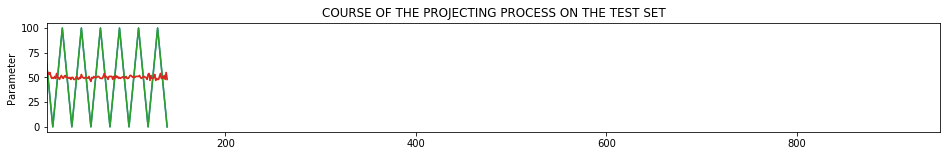

In [76]:
fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y', 'y_interp']:
    ax.plot(NOWA, label=ewa)
    
ax.set_xlim(13, 950)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

<Figure size 432x288 with 0 Axes>

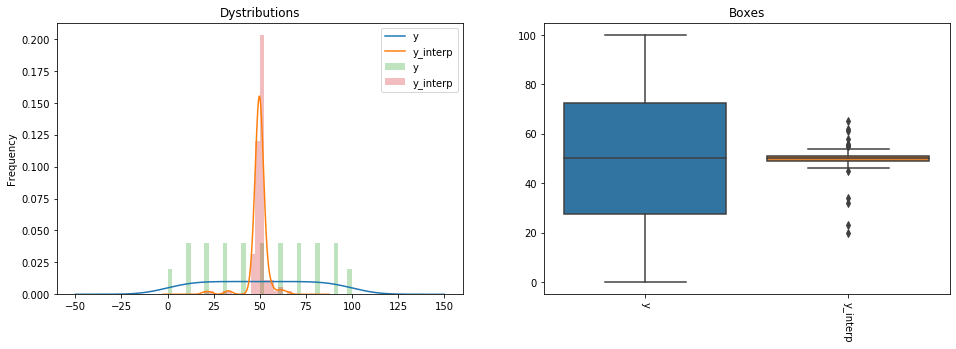

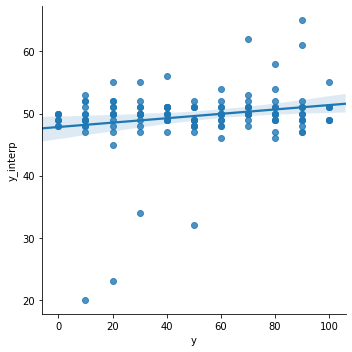

In [52]:
## marginesy
plt.subplots_adjust( left = None , bottom = None , right = None , top = None , wspace = None , hspace = None )
plt.figure(figsize=(16,5))
ax = plt.subplot(1, 2, 1)
NOWA.plot.kde(ax=ax, legend=True, title='Histogram: y vs. y_interp')
NOWA.plot.hist(density=True,bins=40, ax=ax, alpha=0.3)
ax.set_title("Dystributions")

ax = plt.subplot(1, 2, 2)
sns.boxplot(data = NOWA)
plt.xticks(rotation=-90)
ax.set_title("Boxes")


sns.lmplot(data=NOWA, x='y', y='y_interp')

<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> Regression_Assessment

In [53]:
## Robi ocenę tylko dla jednej zmiennej

def Regression_Assessment(y, y_pred):
    
    from sklearn.metrics import r2_score 
    import scipy.stats as stats
    from statsmodels.graphics.gofplots import qqplot
    from matplotlib import pyplot
       
    print('-----two methods--------------')
    SS_Residual = sum((y-y_pred)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-Xtrain.shape[1]-1)
    print('r2_score:           %0.3f' % r_squared)
    #print('adjusted_r_squared: %0.3f' % adjusted_r_squared)
    #print('----r2_score------secound-method--------')  
    print('r2_score:           %0.3f' % r2_score(y, y_pred))  
    print()
    print('-------------------------------')
    MAE = (abs(y-y_pred)).mean()
    print('Mean absolute error     MAE:  %0.2f ' %  MAE)
    RMSE = np.sqrt(((y-y_pred)**2).mean())
    print('Root mean squared error RMSE: %0.2f ' %  RMSE)
    pt = (100*(y-y_pred))/y
    MAPE = (abs(pt)).mean()
    print('Mean absolute error     MAPE: %0.2f ' %  MAPE)
    print('-------------------------------')
    
    stat,pvalue0 = stats.ttest_1samp(a=(y-y_pred),popmean=0.0)

    if pvalue0 > 0.01:
        print('t-test H0: the sum of the model residuals is zero')
        print('OKAY! Model remains do not differ from zero - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue0) 
    else:     
        print('Bad - Model remains DIFFERENT FROM ZERO - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue0)  
    print('--------------------------------------------------------------------------------------------') 
  
       
    stat,pvalue2_1 = stats.shapiro(y)
    stat,pvalue2_2 = stats.shapiro(y_pred)

    if pvalue2_1 > 0.01:
        #print('Shapiro-Wilk H0: y have normal distribution?--------------------------------')
        print('OK Shapiro-Wolf! y have normal distribution - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue2_1) 
    else:     
        print('Bad Shapiro-Wilk - y NO NORMAL DISTRIBUTION - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue2_1)  
        print('--------------------------------------------------------------------------------------------')
    if pvalue2_2 > 0.01:
        #print('Shapiro-Wilk: y_pred have a normal distribution?--')
        print('OK Shapiro-Wolf! y_pred has a normal distribution - pvalue:% 0.4f> 0.01 (we do NOT reject h0)'% pvalue2_2) 
    else:     
        print('Bad Shapiro-Wilk y_pred NO NORMAL DISTRIBUTION - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue2_2)  
    
    qqplot(y, line='s')
    pyplot.show()

    qqplot(y_pred, line='s')
    pyplot.show()
       
    print('--------------------------------------------------------------------------------------------')
        
    stat,pvalue3 = stats.kruskal(y_pred,y)
    stat,pvalue4 = stats.f_oneway(y_pred,y)

    if pvalue2_1 < 0.01 or pvalue2_2 < 0.01:
        print('Shapiro-Vilk: Variables are not normally distributed! Cant do ANOV analysis')
     
        if pvalue3 > 0.01:
            print('Kruskal-Wallis NON-PARAMETRIC TEST: whether empirical forecast and observations. have equal means?')
            print('OKAY! Kruskal-Wallis H0: forecast and observations empir. have equal means - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue3) 
        else:     
            print('Bad - Kruskal-Wallis: forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue3)  
    
    else:

        if pvalue4 > 0.01:
            print('F-test (ANOVA): whether empirical forecast and observations. have equal means?--------------------------------')
            print('OKAY! forecast and observations empir. have equal means - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue4) 
        else:     
            print('Bad - forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue4)  
    print('--------------------------------------------------------------------------------------------')

-----two methods--------------
r2_score:           0.044
r2_score:           0.044

-------------------------------
Mean absolute error     MAE:  24.41 
Root mean squared error RMSE: 28.51 
Mean absolute error     MAPE: inf 
-------------------------------
t-test H0: the sum of the model residuals is zero
OKAY! Model remains do not differ from zero - pvalue: 0.8665> 0.01 (we do NOT reject H0)
--------------------------------------------------------------------------------------------
Bad Shapiro-Wilk - y NO NORMAL DISTRIBUTION - pvalue: 0.0001 <0.01 (We reject H0)
--------------------------------------------------------------------------------------------
Bad Shapiro-Wilk y_pred NO NORMAL DISTRIBUTION - pvalue: 0.0000 <0.01 (We reject H0)


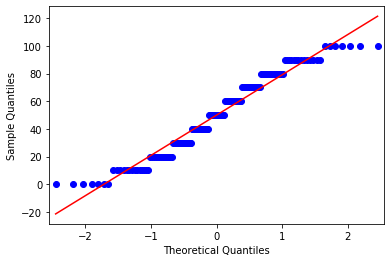

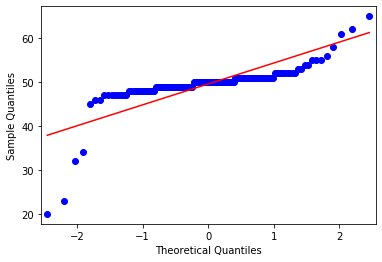

--------------------------------------------------------------------------------------------
Shapiro-Vilk: Variables are not normally distributed! Cant do ANOV analysis
Kruskal-Wallis NON-PARAMETRIC TEST: whether empirical forecast and observations. have equal means?
OKAY! Kruskal-Wallis H0: forecast and observations empir. have equal means - pvalue: 0.8681> 0.01 (we do NOT reject H0)
--------------------------------------------------------------------------------------------


In [54]:
y = NOWA['y']
y_interp = NOWA['y_interp']

Regression_Assessment(y, y_interp)

<span style="font-size: 160%;color:#0c343d;background:#fff2cc"> I choose quotes from the period 46-52 weeks is a super test period (7 weeks)


In [55]:
SuperTest = df2[df2.Week.isin([45,46,47,48,49,50,51,52])] 
SuperTest.head(4)

NameError: name 'df2' is not defined

<span style="font-size: 140%;background: white;font-weight:normal;color:#1155cc">Only the first 10 products

In [ ]:
SuperTest = SuperTest[SuperTest['Product_Code']<=10]
SuperTest.head(4)

In [ ]:
X12 = SuperTest.drop(['Sales'],1)
y12 = SuperTest['Sales']

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X12 = sc.fit_transform(X12)

print(np.round(X12.std(), decimals=2), np.round(X12.mean(), decimals=2))

In [ ]:
X12 = torch.tensor(X12)
X12 = X12.type(torch.FloatTensor).cuda()
print(X12[:3])

In [ ]:
y12 = (y12/ 100)  # max test score is 100
#print(y.head(3))
print('---------------------')
print(np.round(y12.std(), decimals=2), np.round(y12.mean(), decimals=2))

In [ ]:
y12.shape

In [ ]:
y12 = y12.values

In [ ]:
y12 = torch.tensor(y12).cuda()
print(y12[:3])

In [ ]:
y12 = y12.type(torch.FloatTensor).cuda()

In [ ]:
print('X12:',X12.shape)
print('y12:',y12.shape)

In [ ]:
print('X12:',X12[:3])
print('y12:',y12[:3])

In [ ]:
with torch.no_grad():
    y_model = KOT(X12)  
    loss = (y_model - y12).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

In [ ]:
y_model = y_model*100
foka = y_model.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_model']
df11=np.round(df11.y_model)
df11=df11.abs()
df11.head(3)

In [ ]:
df11 = pd.DataFrame(df11)
df11.head(5)

In [ ]:
print(y12[:3])

In [ ]:
y12 = torch.tensor(y12,device='cpu')
print(y12[:3])

In [ ]:
y12 = y12*100
#y12 = np.round(y12)
foka = y12.detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y12']
df_t.head(5)

In [ ]:
Super_NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
Super_NOWA.head(3)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y12', 'y_model']:
    ax.plot(Super_NOWA, label=ewa)
    
ax.set_xlim(0, 70)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

In [ ]:
## marginesy
plt.subplots_adjust( left = None , bottom = None , right = None , top = None , wspace = None , hspace = None )
plt.figure(figsize=(16,5))
ax = plt.subplot(1, 2, 1)
Super_NOWA.plot.kde(ax=ax, legend=True, title='Histogram: y12 vs. y_model')
Super_NOWA.plot.hist(density=True,bins=40, ax=ax, alpha=0.3)
ax.set_title("Dystributions")

ax = plt.subplot(1, 2, 2)
sns.boxplot(data = Super_NOWA)
plt.xticks(rotation=-90)
ax.set_title("Boxes")


sns.lmplot(data=Super_NOWA, x='y12', y='y_model')

In [ ]:
y = Super_NOWA['y12']
y_pred = Super_NOWA['y_model']

Regression_Assessment(y, y_pred)